In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
from sklearn.ensemble import StackingClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.decomposition import PCA
from vecstack import stacking


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Weather_forecast/wtrain_data.csv')
test=pd.read_csv('/content/drive/MyDrive/Weather_forecast/wtest_data.csv')
labels_df = pd.read_csv("/content/drive/MyDrive/Weather_forecast/Train/solution_train.csv",sep=',')

print(f' Shape of  Dataset: {df.shape}')

 Shape of  Dataset: (566, 52)


In [ ]:
df.head()

,date,label,avg.temp_A,avg.temp_B,avg.temp_C,avg.temp_D,avg.temp_E,avg.wind.speed_A,avg.wind.speed_B,avg.wind.speed_C,...,min.temp_A,min.temp_B,min.temp_C,min.temp_D,min.temp_E,precipitation_A,precipitation_B,precipitation_C,precipitation_D,precipitation_E
0,00173aec,2,18.7,17.6,16.9,19.5,14.3,1.6,1.8,0.9,...,14.9,12.5,12.9,16.4,9.0,1.0,1.5,1.5,0.0,4.5
1,0083f291,1,13.1,12.6,12.0,13.0,10.7,1.4,1.0,0.7,...,11.3,11.1,10.6,12.1,8.5,50.0,46.5,49.0,45.5,63.0
2,014cfe7b,2,19.9,19.0,17.5,19.9,16.2,3.7,3.6,0.7,...,16.1,13.5,15.8,16.3,12.4,18.0,17.0,63.5,19.0,32.0
3,01947c8e,2,21.6,20.2,20.5,21.3,17.6,1.6,1.2,1.1,...,15.8,14.2,15.5,15.9,11.5,0.0,1.0,0.0,0.0,0.0
4,0258884d,2,15.2,13.9,13.9,15.8,11.1,2.5,2.3,1.2,...,10.3,5.6,8.9,10.4,5.3,0.0,0.0,0.0,0.0,0.0


Exploratory Data Analysis

Descriptive Statistics

In [ ]:
df.columns

Index(['date', 'label', 'avg.temp_A', 'avg.temp_B', 'avg.temp_C', 'avg.temp_D',
       'avg.temp_E', 'avg.wind.speed_A', 'avg.wind.speed_B',
       'avg.wind.speed_C', 'avg.wind.speed_D', 'avg.wind.speed_E',
       'max.inst.wind.speed_A', 'max.inst.wind.speed_B',
       'max.inst.wind.speed_C', 'max.inst.wind.speed_D',
       'max.inst.wind.speed_E', 'max.inst.wind.speed.dir_A',
       'max.inst.wind.speed.dir_B', 'max.inst.wind.speed.dir_C',
       'max.inst.wind.speed.dir_D', 'max.inst.wind.speed.dir_E', 'max.temp_A',
       'max.temp_B', 'max.temp_C', 'max.temp_D', 'max.temp_E',
       'max.wind.speed_A', 'max.wind.speed_B', 'max.wind.speed_C',
       'max.wind.speed_D', 'max.wind.speed_E', 'max.wind.speed.dir_A',
       'max.wind.speed.dir_B', 'max.wind.speed.dir_C', 'max.wind.speed.dir_D',
       'max.wind.speed.dir_E', 'min.atmos.pressure_A', 'min.atmos.pressure_B',
       'min.atmos.pressure_C', 'min.atmos.pressure_D', 'min.atmos.pressure_E',
       'min.temp_A', 'min.temp_B', 

Data Visualization

Disturbtions

In [ ]:
df['label'].value_counts()

2    354
1    165
0     47
Name: label, dtype: int64

<Axes: xlabel='Count', ylabel='label'>

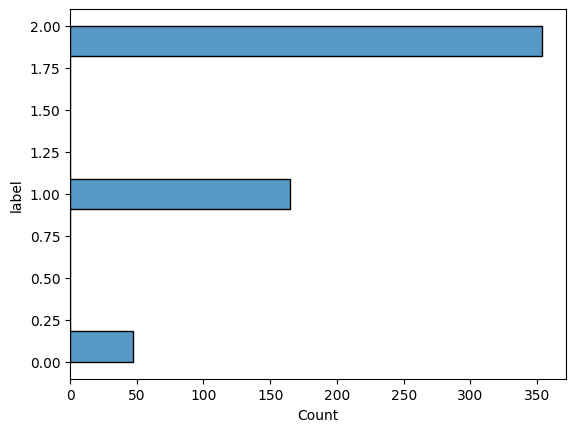

In [ ]:
# histplot
sns.histplot(y=df['label'])

<Axes: xlabel='count', ylabel='label'>

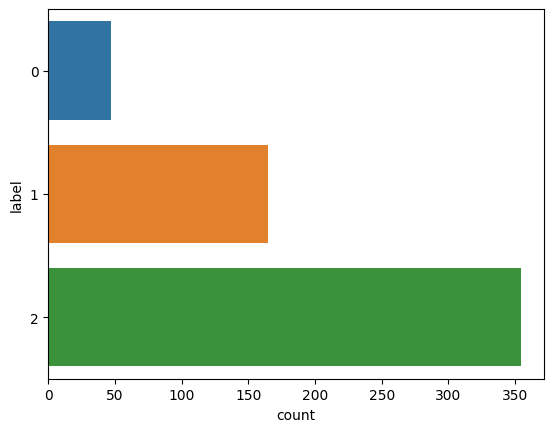

In [ ]:
# countplot
sns.countplot(y=df['label'])

Missing value imputation

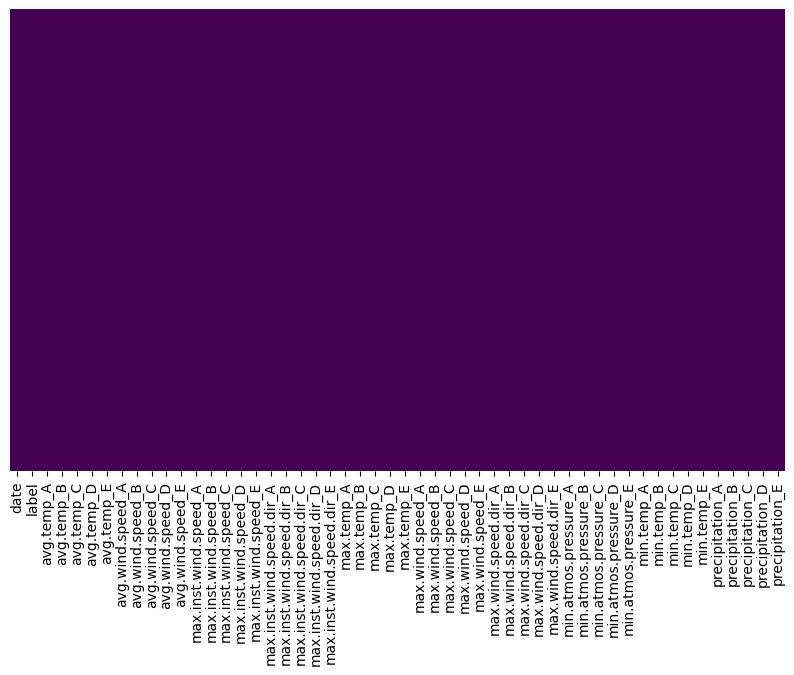

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False);

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

date                         0
label                        0
max.wind.speed_B             0
max.wind.speed_C             0
max.wind.speed_D             0
max.wind.speed_E             0
max.wind.speed.dir_A         0
max.wind.speed.dir_B         0
max.wind.speed.dir_C         0
max.wind.speed.dir_D         0
max.wind.speed.dir_E         0
min.atmos.pressure_A         0
min.atmos.pressure_B         0
min.atmos.pressure_C         0
min.atmos.pressure_D         0
min.atmos.pressure_E         0
min.temp_A                   0
min.temp_B                   0
min.temp_C                   0
min.temp_D                   0
min.temp_E                   0
precipitation_A              0
precipitation_B              0
precipitation_C              0
precipitation_D              0
max.wind.speed_A             0
max.temp_E                   0
max.temp_D                   0
max.inst.wind.speed_A        0
avg.temp_A                   0
avg.temp_B                   0
avg.temp_C                   0
avg.temp

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       566 non-null    object 
 1   label                      566 non-null    int64  
 2   avg.temp_A                 566 non-null    float64
 3   avg.temp_B                 566 non-null    float64
 4   avg.temp_C                 566 non-null    float64
 5   avg.temp_D                 566 non-null    float64
 6   avg.temp_E                 566 non-null    float64
 7   avg.wind.speed_A           566 non-null    float64
 8   avg.wind.speed_B           566 non-null    float64
 9   avg.wind.speed_C           566 non-null    float64
 10  avg.wind.speed_D           566 non-null    float64
 11  avg.wind.speed_E           566 non-null    float64
 12  max.inst.wind.speed_A      566 non-null    float64
 13  max.inst.wind.speed_B      566 non-null    float64

Examine numerical features

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)

Index(['label', 'avg.temp_A', 'avg.temp_B', 'avg.temp_C', 'avg.temp_D',
       'avg.temp_E', 'avg.wind.speed_A', 'avg.wind.speed_B',
       'avg.wind.speed_C', 'avg.wind.speed_D', 'avg.wind.speed_E',
       'max.inst.wind.speed_A', 'max.inst.wind.speed_B',
       'max.inst.wind.speed_C', 'max.inst.wind.speed_D',
       'max.inst.wind.speed_E', 'max.inst.wind.speed.dir_A',
       'max.inst.wind.speed.dir_B', 'max.inst.wind.speed.dir_C',
       'max.inst.wind.speed.dir_D', 'max.inst.wind.speed.dir_E', 'max.temp_A',
       'max.temp_B', 'max.temp_C', 'max.temp_D', 'max.temp_E',
       'max.wind.speed_A', 'max.wind.speed_B', 'max.wind.speed_C',
       'max.wind.speed_D', 'max.wind.speed_E', 'max.wind.speed.dir_A',
       'max.wind.speed.dir_B', 'max.wind.speed.dir_C', 'max.wind.speed.dir_D',
       'max.wind.speed.dir_E', 'min.atmos.pressure_A', 'min.atmos.pressure_B',
       'min.atmos.pressure_C', 'min.atmos.pressure_D', 'min.atmos.pressure_E',
       'min.temp_A', 'min.temp_B', 'min.tem

Data preprocessing

Data Splitting

In [ ]:
X = df.drop(['date','label'],axis=1)
y = df['label']

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (566, 50) 
 y_shape: (566,)


Feature Selection Technique


Random Forest Importance

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=32)
rfe_selector = RFE(estimator=rf_clf, n_features_to_select=20, step=5, verbose=5)
rfe_selector.fit(X, y)

Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estimator with 30 features.
Fitting estimator with 25 features.


RFE(estimator=RandomForestClassifier(n_estimators=32), n_features_to_select=20,
    step=5, verbose=5)

In [ ]:
rfe_support = rfe_selector.get_support()

rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(rfe_feature)
print('*******************************************************************************************')
print(str(len(rfe_feature)), 'selected features')

['avg.temp_C', 'max.inst.wind.speed_A', 'max.inst.wind.speed_B', 'max.inst.wind.speed_C', 'max.inst.wind.speed_D', 'max.inst.wind.speed_E', 'max.temp_B', 'max.temp_C', 'max.wind.speed_A', 'max.wind.speed_B', 'max.wind.speed_C', 'max.wind.speed_D', 'max.wind.speed_E', 'min.atmos.pressure_A', 'min.temp_A', 'min.temp_B', 'min.temp_E', 'precipitation_A', 'precipitation_C', 'precipitation_E']
*******************************************************************************************
20 selected features


In [ ]:
X  = df[rfe_feature]
y = df['label']

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (566, 20) 
 y_shape: (566,)


In [ ]:
y.value_counts()

2    354
1    165
0     47
Name: label, dtype: int64

Over-Sampling to deal with Imbalanced Data

In [ ]:
rs = RandomOverSampler()
X_resample, y_resample = rs.fit_resample(X,y)

print(f' Shape of X after Oversampling: {X_resample.shape} \n Shape of y after Oversampling: {y_resample.shape}')

 Shape of X after Oversampling: (1062, 20) 
 Shape of y after Oversampling: (1062,)


In [ ]:
y_resample.value_counts()

2    354
1    354
0    354
Name: label, dtype: int64

Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_rescale = scl.fit_transform(X_resample)

Data Splitting into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_rescale,y_resample,test_size=0.20,shuffle=True,random_state=21)
print(f' Shape of X_train: {X_train_res.shape} & Shape of X_test: {X_test_res.shape}')
print(f' Shape of y_train: {y_train_res.shape} & Shape of y_test: {y_test_res.shape}')

 Shape of X_train: (849, 20) & Shape of X_test: (213, 20)
 Shape of y_train: (849,) & Shape of y_test: (213,)


Model Selection

RandomForest Classifier

In [ ]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_res, y_train_res)
y_pred_test_res = rf_clf.predict(X_test_res)
y_pred_train_res = rf_clf.predict(X_train_res)

In [ ]:
print('Accuracy score of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy score of Train after Oversampling: 100.0
Accuracy score of Test after Oversampling: 84.50704225352112


Hyperparamter tuning using optuna

In [ ]:
def objective(trial):
    param_grid = dict(
    criterion = trial.suggest_categorical('criterion', ['gini','entropy']),
    bootstrap = trial.suggest_categorical('bootstrap',['True','False']),
    max_depth = trial.suggest_int('max_depth', 1, 10000),
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000),
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000),
    random_state = trial.suggest_categorical('random_state', [45])
    )
    
    rf_clf = RandomForestClassifier(**param_grid )
    scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2, show_progress_bar=True)

[I 2023-04-05 01:54:01,450] A new study created in memory with name: no-name-8817a403-f3c1-49b1-9220-19e28c9ce25c
/usr/local/lib/python3.9/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/2 [00:00<?, ?it/s]

[W 2023-04-05 01:54:01,568] Trial 0 failed with parameters: {'criterion': 'entropy', 'bootstrap': 'False', 'max_depth': 3779, 'max_features': 'sqrt', 'max_leaf_nodes': 8126, 'n_estimators': 219, 'random_state': 45} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n5 fits failed with the following error:\nTraceback (most recent call last):\n  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\n  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit\n    self._validate_params()\n  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params\n   

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 30, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 100)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000),

    rf_clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        bootstrap=bootstrap,
        random_state=45,
    )

    scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5, scoring="accuracy")

    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2, show_progress_bar=True)


[I 2023-04-05 01:57:34,925] A new study created in memory with name: no-name-9bdb73c8-b03b-4626-a386-53a5be5ac67b
/usr/local/lib/python3.9/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/2 [00:00<?, ?it/s]

[I 2023-04-05 01:57:37,553] Trial 0 finished with value: 0.8775356769926905 and parameters: {'n_estimators': 72, 'max_depth': 89, 'criterion': 'entropy', 'bootstrap': False, 'max_features': 'auto', 'max_leaf_nodes': 7772}. Best is trial 0 with value: 0.8775356769926905.
[I 2023-04-05 01:57:46,950] Trial 1 finished with value: 0.8692794987817611 and parameters: {'n_estimators': 551, 'max_depth': 79, 'criterion': 'gini', 'bootstrap': True, 'max_features': 'log2', 'max_leaf_nodes': 6818}. Best is trial 0 with value: 0.8775356769926905.


In [ ]:
best_params_rf = study.best_trial.params
print('Best parameters:', best_params_rf)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'n_estimators': 72, 'max_depth': 89, 'criterion': 'entropy', 'bootstrap': False, 'max_features': 'auto', 'max_leaf_nodes': 7772}
Best score: 87.75%


In [ ]:
rf_clf = RandomForestClassifier(**best_params_rf).fit(X_train_res,y_train_res)
y_pred_rf = rf_clf.predict(X_test_res)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_rf)*100)

Accuracy score of Test:  86.85446009389672


In [ ]:
unique, counts = np.unique(y_pred_rf, return_counts=True)

print (np.asarray((unique, counts)))

[[ 0  1  2]
 [80 58 75]]


In [ ]:
print(classification_report(y_test_res, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       0.86      0.75      0.80        67
           2       0.80      0.85      0.82        71

    accuracy                           0.87       213
   macro avg       0.87      0.86      0.86       213
weighted avg       0.87      0.87      0.87       213



LGBM Classifier

In [ ]:
def objective(trial):
    param_grid = dict(n_estimators=trial.suggest_int('n_estimators', 20, 1000, 10), 
                      learning_rate=trial.suggest_float('learning_rate', 0, 1), 
                      max_depth=trial.suggest_int('max_depth', 3, 12),
                      random_state = trial.suggest_categorical('random_state', [45]))
    clf = LGBMClassifier(**param_grid)
    scores = cross_val_score(clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2023-04-05 02:00:42,646] A new study created in memory with name: no-name-25f06a94-5e32-44ad-bcc7-7fa3bf90b2ec
/usr/local/lib/python3.9/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-05 02:00:45,860] Trial 0 finished with value: 0.86454 and parameters: {'n_estimators': 260, 'learning_rate': 0.6789450609539074, 'max_depth': 7, 'random_state': 45}. Best is trial 0 with value: 0.86454.
[I 2023-04-05 02:00:50,862] Trial 1 finished with value: 0.87278 and parameters: {'n_estimators': 130, 'learning_rate': 0.38218398283085486, 'max_depth': 7, 'random_state': 45}. Best is trial 1 with value: 0.87278.
[I 2023-04-05 02:00:52,333] Trial 2 finished with value: 0.87163 and parameters: {'n_estimators': 500, 'learning_rate': 0.8586194962585422, 'max_depth': 7, 'random_state': 45}. Best is trial 1 with value: 0.87278.
[I 2023-04-05 02:00:53,201] Trial 3 finished with value: 0.86692 and parameters: {'n_estimators': 80, 'learning_rate': 0.10609906997085128, 'max_depth': 7, 'random_state': 45}. Best is trial 1 with value: 0.87278.
[I 2023-04-05 02:00:54,073] Trial 4 finished with value: 0.85394 and parameters: {'n_estimators': 220, 'learning_rate': 0.9642296295698329, 'ma

In [ ]:
best_params_lgb = study.best_trial.params
print('Best parameters:', best_params_lgb)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'n_estimators': 830, 'learning_rate': 0.04762195870152597, 'max_depth': 9, 'random_state': 45}
Best score: 88.34%


In [ ]:
lgb_clf = LGBMClassifier(**best_params_lgb).fit(X_train_res,y_train_res)
y_pred_lgb = lgb_clf.predict(X_test_res)

In [ ]:
y_test_res_lgb = np.unique(y_test_res, return_inverse = True)[1] 

In [ ]:
print('Accuracy score of Test: ', accuracy_score(y_test_res_lgb, y_pred_lgb)*100)

Accuracy score of Test:  84.50704225352112


In [ ]:
print(classification_report(y_test_res_lgb, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       0.81      0.76      0.78        67
           2       0.79      0.76      0.78        71

    accuracy                           0.85       213
   macro avg       0.84      0.84      0.84       213
weighted avg       0.84      0.85      0.84       213



In [ ]:
rf = accuracy_score(y_test_res,y_pred_rf)*100
#xgb = accuracy_score(y_test_res_xgb,y_pred_xgb)*100
lgb = accuracy_score(y_test_res_lgb,y_pred_lgb)*100
#voting = accuracy_score(y_test_res_voting,voting_clf_pred)*100

scores = [rf,lgb]
labels = ['Random Forest Classifier','LGB Classifier']
accs = {'Accuracy': scores}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Random Forest Classifier,86.854460
LGB Classifier,84.507042


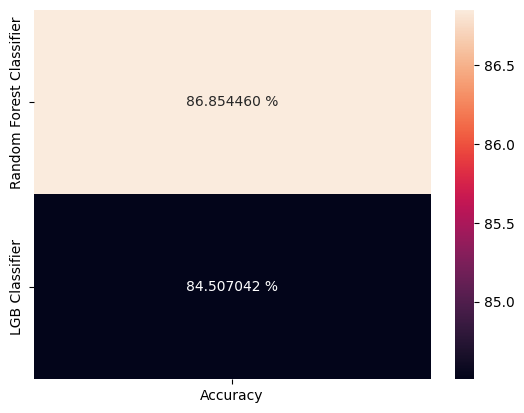

In [ ]:
ax = sns.heatmap(df,annot=True,fmt="1f")
for t in ax.texts: t.set_text(t.get_text() + " %")

In [ ]:
from sklearn.svm import SVC

In [ ]:
models_l=[('RFC',RandomForestClassifier(**best_params_rf)),('LMBMC',LGBMClassifier(**best_params_lgb),('svc' ,SVC(C = 1, gamma = 0.001)))]

Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
modelsc = StackingClassifier(estimators=models_l,final_estimator=LogisticRegression(),cv=10,verbose=5) 
#RandomForestClassifier(n_estimators=32)        
modelsc.fit(X_train_res,y_train_res) #final_estimator=

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(bootstrap=False,
                                                       criterion='entropy',
                                                       max_depth=89,
                                                       max_features='auto',
                                                       max_leaf_nodes=7772,
                                                       n_estimators=72)),
                               ('LMBMC',
                                LGBMClassifier(learning_rate=0.04762195870152597,
                                               max_depth=9, n_estimators=830,
                                               random_state=45),
                                ('svc', SVC(C=1, gamma=0.001)))],
                   final_estimator=LogisticRegression(), verbose=5)

In [ ]:
y_pred_modelsc = modelsc.predict(X_test_res)


In [ ]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_modelsc)*100)


Accuracy score of Test:  87.79342723004694


In [ ]:
X_test = test[rfe_feature]
X_rescaled = scl.transform(X_test)

In [ ]:
test_preds = modelsc.predict(X_rescaled) #rf_clf
submission_df = pd.concat([test['date'], pd.DataFrame(test_preds, columns=['label'])], axis=1)
submission_df.head()

,date,label
0,0001f2fd,0
1,00177dc1,1
2,00b3a048,1
3,013f131b,2
4,01a1b150,2


In [ ]:
le_name_map={'H': 0, 'L': 1, 'N': 2}

In [ ]:
inv_map = {v: k for k, v in le_name_map.items()}
inv_map

{0: 'H', 1: 'L', 2: 'N'}

In [ ]:
submission_df['label'] = submission_df['label'].map(inv_map)  
submission_df

,date,label
0,0001f2fd,H
1,00177dc1,L
2,00b3a048,L
3,013f131b,N
4,01a1b150,N
...,...,...
373,fd48b23a,H
374,fd52bb91,L
375,fe708035,N
376,ff11ac29,N


In [ ]:
format_df = pd.read_csv("/content/drive/MyDrive/Weather_forecast/Train/solution_format.csv",sep=',')
# format_df = format_df.drop('label', inplace=True, axis=1)
# format_df.head()
del format_df["label"]
format_df

,date
0,b92d713a
1,18817005
2,8e19dc3c
3,6f0929dc
4,c7506622
...,...
373,01a1b150
374,90b49549
375,15bc4979
376,b4104846


In [ ]:
format_df = format_df.merge(submission_df, on="date")
format_df
# format_df.rename(columns = {'label_y':'label'}, inplace = True)

,date,label
0,b92d713a,N
1,18817005,N
2,8e19dc3c,N
3,6f0929dc,N
4,c7506622,N
...,...,...
373,01a1b150,N
374,90b49549,N
375,15bc4979,L
376,b4104846,L


In [ ]:
import csv

format_df.to_csv(
    "my_solution.csv",
    quoting=csv.QUOTE_NONNUMERIC,
    escapechar="\\",
    doublequote=False,
    index=False)